In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D, Flatten, Dense, Dropout

Using TensorFlow backend.


In [8]:
classifier = Sequential()

classifier.add(Conv2D(filters=128, kernel_size=(3,3), activation= 'relu', input_shape= (40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation= 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units=10, activation='softmax'))

classifier.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [10]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen= ImageDataGenerator(rescale= 1./255, shear_range= .2, rotation_range= 25)
test_datagen= ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train',target_size = (40,40), batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test',target_size = (40,40), batch_size = 32, class_mode = 'categorical')

Found 7000 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


In [11]:
classifier.fit_generator(training_set, steps_per_epoch=7000, epochs= 10, validation_data= test_set, validation_steps= 3000 )

Epoch 1/10
  32/7000 [..............................] - ETA: 31:15 - loss: 2.3115 - accuracy: 0.0859

KeyboardInterrupt: 

In [8]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 38, 38, 128)       3584      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)             

In [10]:
classifier_json = classifier.to_json()
with open("banglafont_detector.json","w") as json_file:
    json_file.write(classifier_json)

classifier.save_weights("banglafont_detector.h5")
print('Saved')

Saved


# afterwork

In [11]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
from keras.preprocessing import image
import os

from keras.models import load_model
from keras.models import model_from_json
import json

In [4]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255,255,255)
    green = (0,128,0)
    
    def save():
        filename= 'C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/Dataset/SinglePrediction/image.jpg'
        image.save(filename)
    
    def paint(event):
        x1, y1 = (event.x -1),(event.y -1)
        x2, y2 = (event.x +1),(event.y +1)
        cv.create_oval(x1, y1,x2, y2, fill='black', width = 30)
        draw.line([x1, y1,x2, y2], fill='black', width = 30)
    root= Tk()
    
    cv= Canvas(root,width=width,height=height, bg='white')
    cv.pack()
    
    image = PIL.Image.new('RGB',(width,height),white)
    draw=ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>",paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [18]:
#create_new_image()

In [19]:
training_set.class_indices

{'172': 0,
 '173': 1,
 '174': 2,
 '175': 3,
 '176': 4,
 '177': 5,
 '178': 6,
 '179': 7,
 '180': 8,
 '181': 9,
 '182': 10,
 '183': 11,
 '184': 12,
 '185': 13,
 '186': 14,
 '187': 15,
 '188': 16,
 '189': 17,
 '190': 18,
 '191': 19,
 '192': 20,
 '193': 21,
 '194': 22,
 '195': 23,
 '196': 24,
 '197': 25,
 '198': 26,
 '199': 27,
 '200': 28,
 '201': 29,
 '202': 30,
 '203': 31,
 '204': 32,
 '205': 33,
 '206': 34,
 '207': 35,
 '208': 36,
 '209': 37,
 '210': 38,
 '211': 39,
 '212': 40,
 '213': 41,
 '214': 42,
 '215': 43,
 '216': 44,
 '217': 45,
 '218': 46,
 '219': 47,
 '220': 48,
 '221': 49}

In [ ]:
অ, আ, ই, ঈ, উ, ঊ, ঋ, এ, ঐ, ও, ঔ,
ক, খ, গ, ঘ, ঙ, 
চ, ছ, জ, ঝ, ঞ, 
ট, ঠ, ড, ঢ, ণ, 
ত, থ, দ, ধ, ন, 
প, ফ, ব, ভ, ম, 
য, র, ল, শ, ষ, 
স, হ, হ, ঢ়, য়, ৎ, ং, ঃ, 

In [1]:
def determine_character(result):
    if result == 0:
        print('Predecition : অ')
    elif result == 1:
        print('Predecition : আ,')
    elif result == 2:
        print('Predecition : ই,')
    elif result == 3:
        print('Predecition : ঈ,')
    elif result == 4:
        print('Predecition : উ,')
    elif result == 5:
        print('Predecition : ঊ,')
    elif result == 6:
        print('Predecition : ঋ,')
    elif result == 7:
        print('Predecition : এ,')
    elif result == 9:
        print('Predecition : ঐ,')
    elif result == 10:
        print('Predecition : ও,')
    elif result == 11:
        print('Predecition : ঔ,')
    elif result == 12:
        print('Predecition : ক,')
    elif result == 13:
        print('Predecition : খ,')
    elif result == 14:
        print('Preecition : গ,')
    elif result == 15:
        print('Predecition : ঘ,')
    elif result == 16:
        print('Predecition : ঙ,')
    elif result == 17:
        print('Predecition : চ,')
    elif result == 18:
        print('Predecition : ছ,')
    elif result == 19:
        print('Predecition : জ,')
    elif result == 20:
        print('Predecition : ঝ,')
    elif result == 21:
        print('Predecition : ঞ,')
    elif result == 22:
        print('Predecition : ট,')
    elif result == 23:
        print('Predecition : ঠ,')
    elif result == 24:
        print('Predecition : ড,')
    elif result == 25:
        print('Predecition : ঢ,')
    elif result ==26:
        print('Predecition : ণ,')
    elif result == 27:
        print('Predecition : ত,')
    elif result == 28:
        print('Predecition : থ,')
    elif result == 29:
        print('Predecition : দ,')
    elif result == 30:
        print('Predecition : ধ,')
    elif result == 31:
        print('Predecition : ন,')
    elif result == 32:
        print('Predecition : প,')
    elif result == 33:
        print('Predecition : ফ,')
    elif result == 34:
        print('Predecition : ব,')
    elif result == 35:
        print('Predecition : ভ,')
    elif result == 0:
        print('Predecition : য,')
    elif result == 36:
        print('Predecition : র,')
    elif result == 37:
        print('Predecition : ল,')
    elif result == 38:
        print('Predecition : শ,')
    elif result == 39:
        print('Predecition : ষ,')
    elif result == 40:
        print('Predecition : স,')
    elif result == 41:
        print('Predecition : হ,')
    elif result == 42:
        print('Predecition : ড়')
    elif result == 43:
        print('Predecition : ঢ়,')
    elif result == 44:
        print('Predecition : য়,')
    elif result == 45:
        print('Predecition : ৎ,')
    elif result == 47:
        print('Predecition :  অনেষ্বর')
    elif result == 48:
        print('Predecition : ঃ')
    else:
        print('Predecition : চন্দ্রবিন্দু')

In [12]:
import numpy as np

def single_prediction(test_img):
    test_img_arr= image.img_to_array(test_img)
    test_img_arr=np.expand_dims(test_img_arr,axis=0)
    
    with open('banglafont_detector.json','r') as f:
        model_json = json.load(f)

    classifier = model_from_json(model_json)
    classifier.load_weights('banglafont_detector.h5')
    
    
    prediction = classifier.predict(test_img_arr)
    result= np.argmax(prediction,axis=1)
    determine_character(result)

In [3]:
def delete_created_image():
    os.remove('C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/Dataset/SinglePrediction/image.jpg')

In [5]:
import matplotlib.pyplot as plt

def draw_n_guess_the_character():
    create_new_image()
    test_img=image.load_img('C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/Dataset/SinglePrediction/image.jpg', target_size=(40,40,3))
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()

In [13]:
draw_n_guess_the_character()

TypeError: the JSON object must be str, bytes or bytearray, not 'dict'

In [47]:
img=image.load_img('C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/13.jpg')
img=img.resize((224,224))
img.save('C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/13var02.jpg')

Predecition : অ


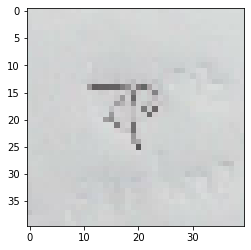

In [48]:
test_img=image.load_img('C:/Users/USer/Documents/JUPY/BanglaFontRecognizer/13var02.jpg', target_size=(40,40,3))
single_prediction(test_img)
plt.imshow(test_img)